In [1]:
library(CellChat)
library(tidyverse)
library(Seurat)

Loading required package: dplyr

Warning message:
“package ‘dplyr’ was built under R version 4.4.3”



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: ggplot2

Warning message:
“package ‘tidyverse’ was built under R version 4.4.3”
Warning message:
“package ‘tibble’ was built under R version 4.4.3”
Warning message:
“package ‘readr’ was built under R version 4.4.3”
Warning message:
“package ‘forcats’ was built under R version 4.4.3”
Warning message:
“package ‘lubridate’ was built under R version 4.4.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.1     ✔ stringr   

In [2]:
cellchat <- readRDS('/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/adult/cellchat/obj_cellchat_done.rds')
cellchat_2 <- readRDS('/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/adult/cellchat/obj_cellchat_done_v2.rds')
cellchat
cellchat_2

An object of class CellChat created from a single dataset 
 36031 genes.
 346898 cells. 
CellChat analysis of single cell RNA-seq data! 

An object of class CellChat created from a single dataset 
 36031 genes.
 346898 cells. 
CellChat analysis of single cell RNA-seq data! 

In [3]:
cellchat@netP$pathways
cellchat_2@netP$pathways

[1] "MIF"        "SPP1"       "PTN"        "CypA"       "MK"        
 [6] "ANNEXIN"    "GALECTIN"   "PSAP"       "COMPLEMENT" "GRN"       
[11] "VISFATIN"   "PARs"       "NRG"        "IL1"        "VEGF"      
[16] "EGF"        "PLAU"       "IGFBP"      "TGFb"       "TNF"       
[21] "ANGPTL"     "BAFF"       "SEMA3"      "ANGPT"      "FGF"       
[26] "CALCR"      "GAS"        "PDGF"       "EDN"        "PTPR"

[1] "MIF"        "SPP1"       "PTN"        "CypA"       "MK"        
 [6] "ANNEXIN"    "GALECTIN"   "PSAP"       "COMPLEMENT" "GRN"       
[11] "VISFATIN"   "PARs"       "NRG"        "IL1"        "VEGF"      
[16] "EGF"        "PLAU"       "IGFBP"      "TGFb"       "TNF"       
[21] "ANGPTL"     "BAFF"       "SEMA3"      "ANGPT"      "FGF"       
[26] "CALCR"      "GAS"        "PDGF"       "EDN"        "PTPR"

In [4]:
options(repr.plot.width = 14, repr.plot.height = 10)

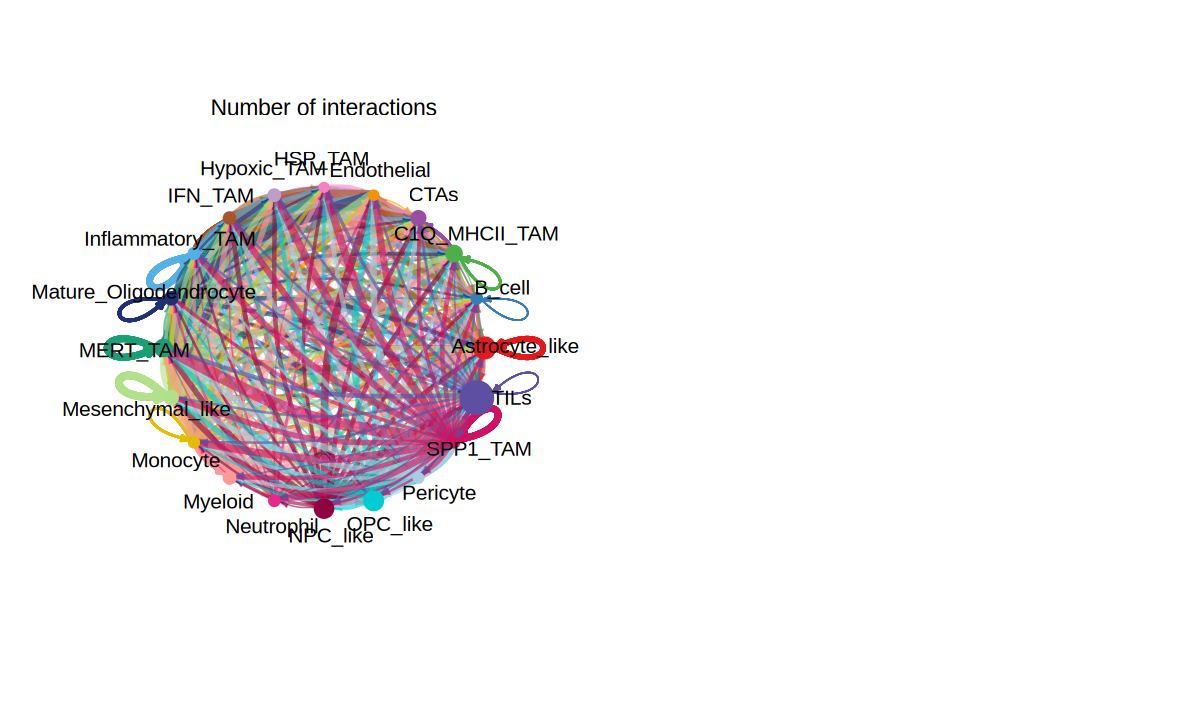

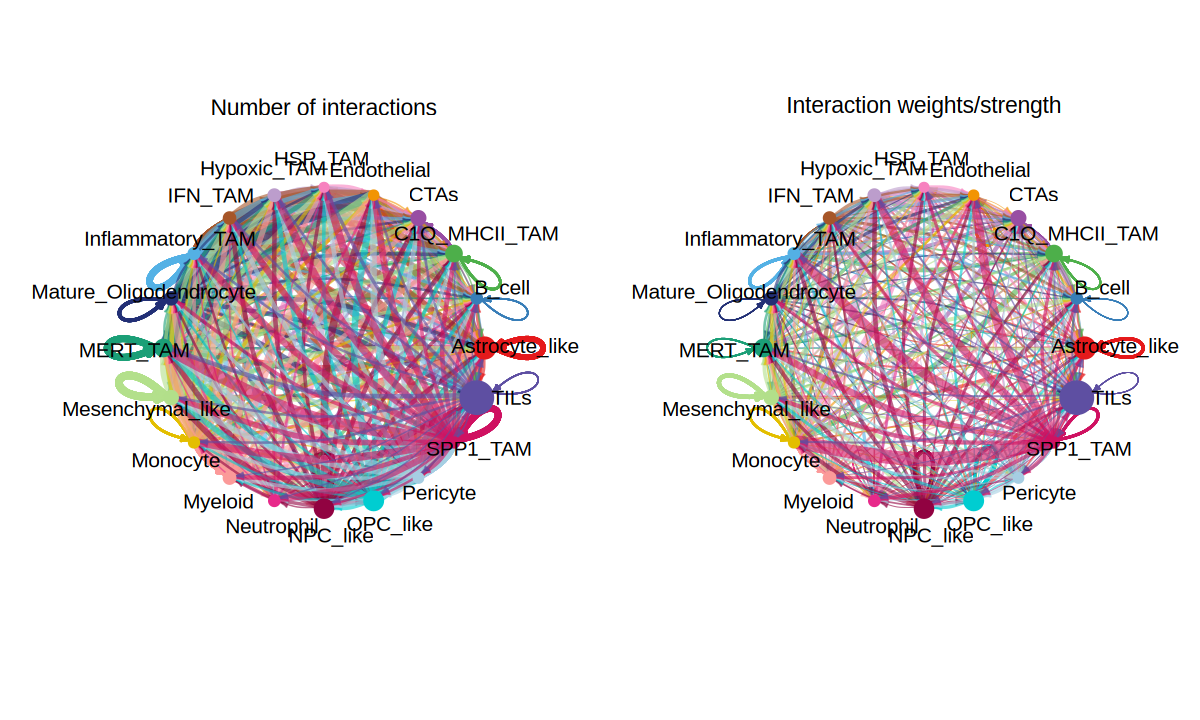

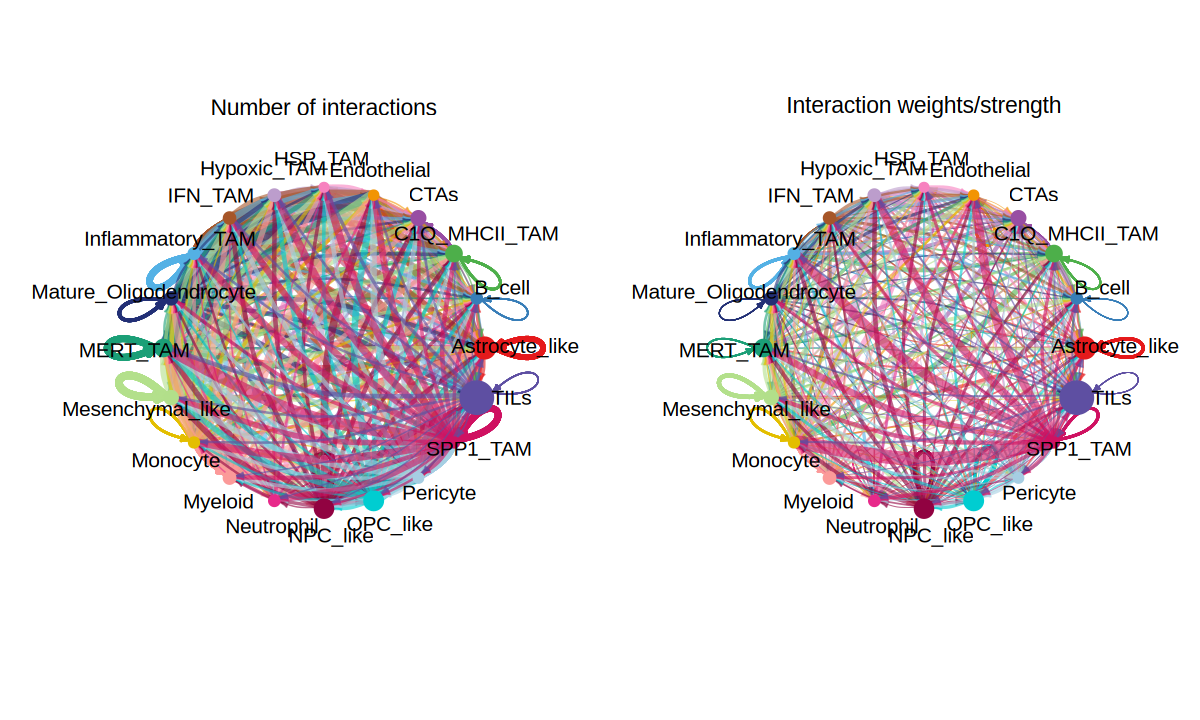

In [51]:
groupSize <- as.numeric(table(cellchat@idents)) # Contain identity label of cells 
par(mfrow = c(1,2), xpd=TRUE) # Display 1 row and 2 columns of plots side by side
netVisual_circle(cellchat@net$count, vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Number of interactions") 
netVisual_circle(cellchat@net$weight, vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Interaction weights/strength") 

In [6]:
df.net <- subsetCommunication(cellchat, slot.name = "netP")
df.net$pathway_name |> unique()

[1] "MK"         "NRG"        "PTN"        "MIF"        "CypA"      
 [6] "ANNEXIN"    "ANGPTL"     "SPP1"       "GRN"        "VISFATIN"  
[11] "COMPLEMENT" "PSAP"       "PARs"       "PLAU"       "ANGPT"     
[16] "IGFBP"      "PDGF"       "GAS"        "EDN"        "GALECTIN"  
[21] "TGFb"       "IL1"        "CALCR"      "BAFF"       "TNF"       
[26] "FGF"        "SEMA3"      "VEGF"       "EGF"        "PTPR"

In [16]:
table(cellchat@idents)


        Astrocyte_like                 B_cell          C1Q_MHCII_TAM 
                 40480                   6662                  22753 
                  CTAs            Endothelial                HSP_TAM 
                 17402                   2679                   1306 
           Hypoxic_TAM                IFN_TAM       Inflammatory_TAM 
                 10159                   9421                   7800 
Mature_Oligodendrocyte               MERT_TAM       Mesenchymal_like 
                 12744                  25707                  15646 
              Monocyte                Myeloid             Neutrophil 
                  5158                  10143                   6503 
              NPC_like               OPC_like               Pericyte 
                 31955                  33258                   3628 
              SPP1_TAM                   TILs 
                  5463                  78031 

In [27]:
my_palette <- c(
  "Astrocyte_like"          = "#3182bd", # Deep Blue
  "B_cell"                  = "#e377c2", # Pink
  "C1Q_MHCII_TAM"           = "#e6550d", # Dark Orange
  "CTAs"                    = "#9ecae1", # Light Blue
  "Endothelial"             = "#8c564b", # Brown
  "HSP_TAM"                 = "#fd8d3c", # Orange
  "Hypoxic_TAM"             = "#fdd0a2", # Pale Orange
  "IFN_TAM"                 = "#d94801", # Burnt Orange
  "Inflammatory_TAM"        = "#8c2d04", # Dark Brown-Red
  "Mature_Oligodendrocyte"  = "#756bb1", # Purple
  "MERT_TAM"                = "#fdae6b", # Peach
  "Mesenchymal_like"        = "#bcbd22", # Olive/Yellow
  "Monocyte"                = "#ffbb78", # Light Orange-Tan
  "Myeloid"                 = "#969696", # Grey
  "Neutrophil"              = "#dbdb8d", # Pale Olive
  "NPC_like"                = "#6baed6", # Sky Blue
  "OPC_like"                = "#9e9ac8", # Lavender
  "Pericyte"                = "#c49c94", # Rosy Brown
  "SPP1_TAM"                = "#a63603", # Rust Orange
  "TILs"                    = "#2ca02c"  # Green
)

In [24]:
cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "netP")

In [25]:
pathways.show <- cellchat@netP$pathways

In [35]:
ht1 <- netAnalysis_signalingRole_heatmap(
  cellchat, 
  pattern = "all", 
  color.use = my_palette, 
  signaling = pathways.show, 
  title = "Signaling Role - Raw Data", 
  width = 10, 
  height = 16, 
  font.size = 12, 
  font.size.title = 14
)

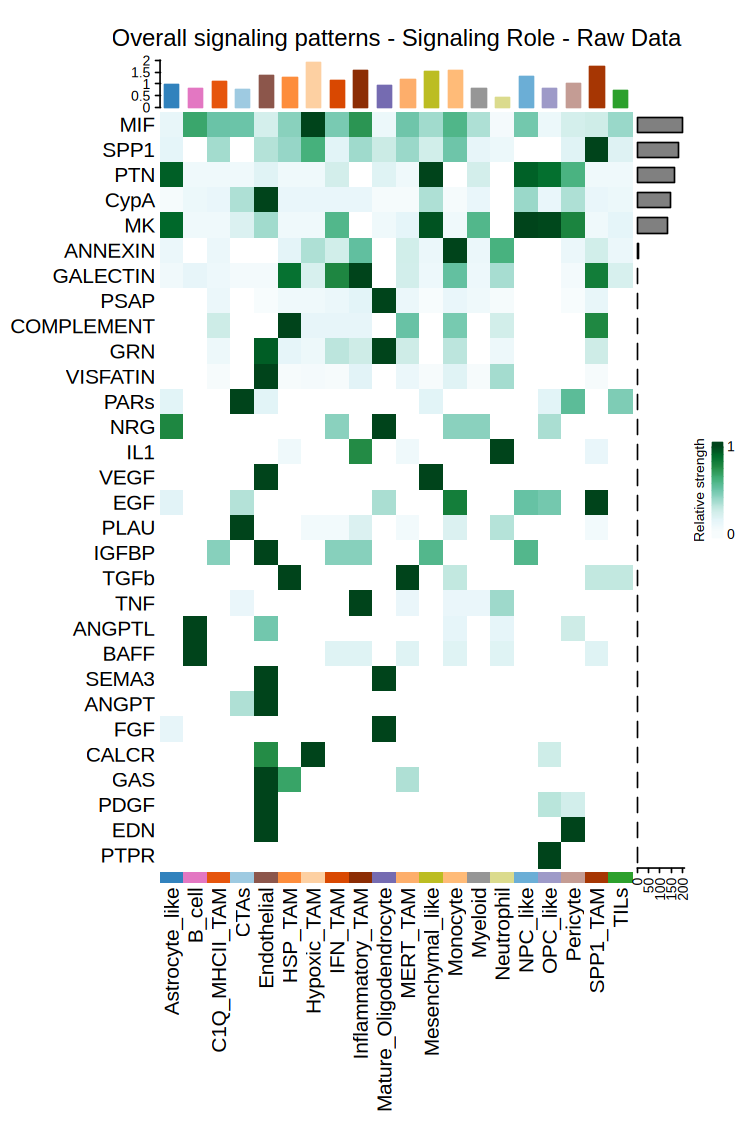

In [39]:
options(repr.plot.width = 6.2, repr.plot.height = 9.5)
ht1

Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.
ℹ The deprecated feature was likely used in the CellChat package.
  Please report the issue to the authors.”


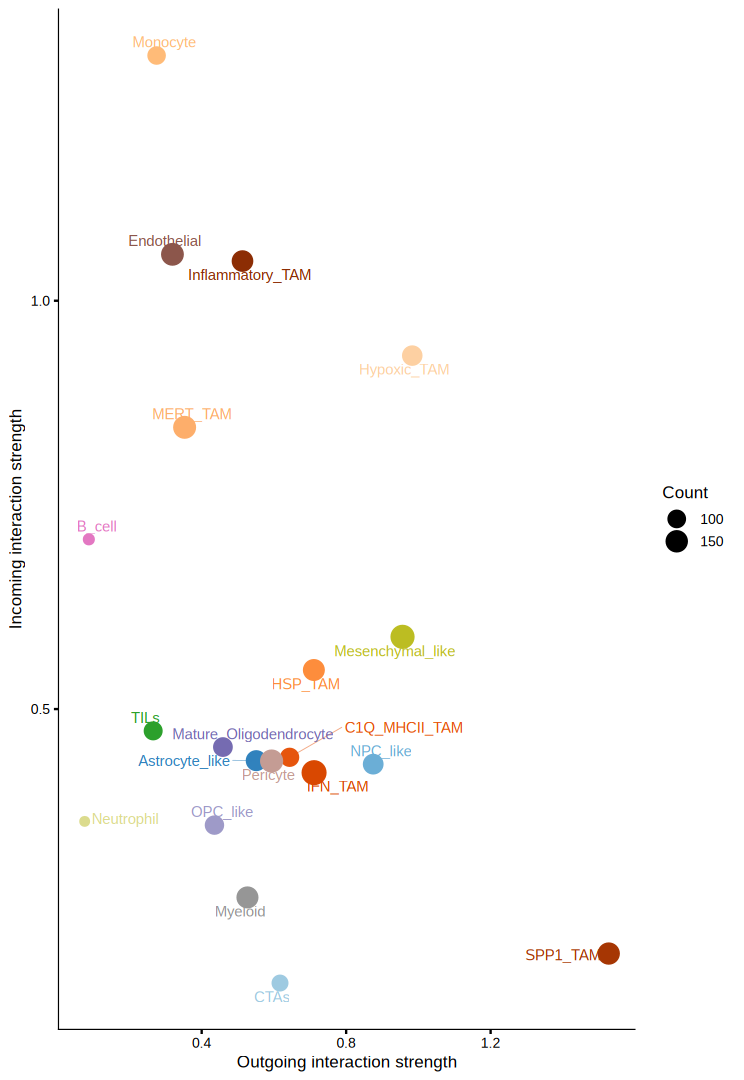

In [31]:
netAnalysis_signalingRole_scatter(cellchat, color.use = my_palette)

In [19]:
spp1 <- df.net |> filter(pathway_name == "SPP1")
spp1 |> arrange(desc(prob)) |> head()

source      target           pathway_name prob       pval
1 SPP1_TAM    Monocyte         SPP1         0.16978590 0   
2 SPP1_TAM    Endothelial      SPP1         0.11810527 0   
3 SPP1_TAM    Inflammatory_TAM SPP1         0.11706340 0   
4 SPP1_TAM    Hypoxic_TAM      SPP1         0.09044449 0   
5 HSP_TAM     Monocyte         SPP1         0.07737639 0   
6 Hypoxic_TAM Monocyte         SPP1         0.07194375 0

In [40]:
mif <- df.net |> filter(pathway_name == 'MIF')
mif |> arrange(desc(prob)) |> head()

source      target      pathway_name prob       pval
1 CTAs        B_cell      MIF          0.07524796 0   
2 NPC_like    B_cell      MIF          0.07240608 0   
3 CTAs        Hypoxic_TAM MIF          0.07168368 0   
4 NPC_like    Hypoxic_TAM MIF          0.06887235 0   
5 Hypoxic_TAM B_cell      MIF          0.06719726 0   
6 CTAs        Monocyte    MIF          0.06621566 0

In [41]:
complement <- df.net |> filter(pathway_name == 'COMPLEMENT')
complement |> arrange(desc(prob)) |> head()

source   target   pathway_name prob       pval
1 HSP_TAM  Monocyte COMPLEMENT   0.02082314 0   
2 SPP1_TAM Monocyte COMPLEMENT   0.02082314 0   
3 HSP_TAM  HSP_TAM  COMPLEMENT   0.01593760 0   
4 SPP1_TAM HSP_TAM  COMPLEMENT   0.01593760 0   
5 HSP_TAM  MERT_TAM COMPLEMENT   0.01105205 0   
6 SPP1_TAM MERT_TAM COMPLEMENT   0.01105205 0

In [9]:
spp1$source |> unique()
spp1$target |> unique()

[1] "C1Q_MHCII_TAM"          "HSP_TAM"                "Hypoxic_TAM"           
 [4] "IFN_TAM"                "Inflammatory_TAM"       "MERT_TAM"              
 [7] "Mature_Oligodendrocyte" "Mesenchymal_like"       "Myeloid"               
[10] "SPP1_TAM"

[1] "Astrocyte_like"   "C1Q_MHCII_TAM"    "Endothelial"      "Hypoxic_TAM"     
 [5] "IFN_TAM"          "Inflammatory_TAM" "MERT_TAM"         "Mesenchymal_like"
 [9] "Monocyte"         "Myeloid"          "Neutrophil"       "Pericyte"        
[13] "SPP1_TAM"         "TILs"

In [42]:
table(cellchat@idents)


        Astrocyte_like                 B_cell          C1Q_MHCII_TAM 
                 40480                   6662                  22753 
                  CTAs            Endothelial                HSP_TAM 
                 17402                   2679                   1306 
           Hypoxic_TAM                IFN_TAM       Inflammatory_TAM 
                 10159                   9421                   7800 
Mature_Oligodendrocyte               MERT_TAM       Mesenchymal_like 
                 12744                  25707                  15646 
              Monocyte                Myeloid             Neutrophil 
                  5158                  10143                   6503 
              NPC_like               OPC_like               Pericyte 
                 31955                  33258                   3628 
              SPP1_TAM                   TILs 
                  5463                  78031 

In [74]:
pairLR.use <- extractEnrichedLR(cellchat, signaling = c("MIF"))
pairLR.use 

interaction_name
1 MIF_CD74_CXCR4  
2 MIF_CD74_CD44

Comparing communications on a single object 




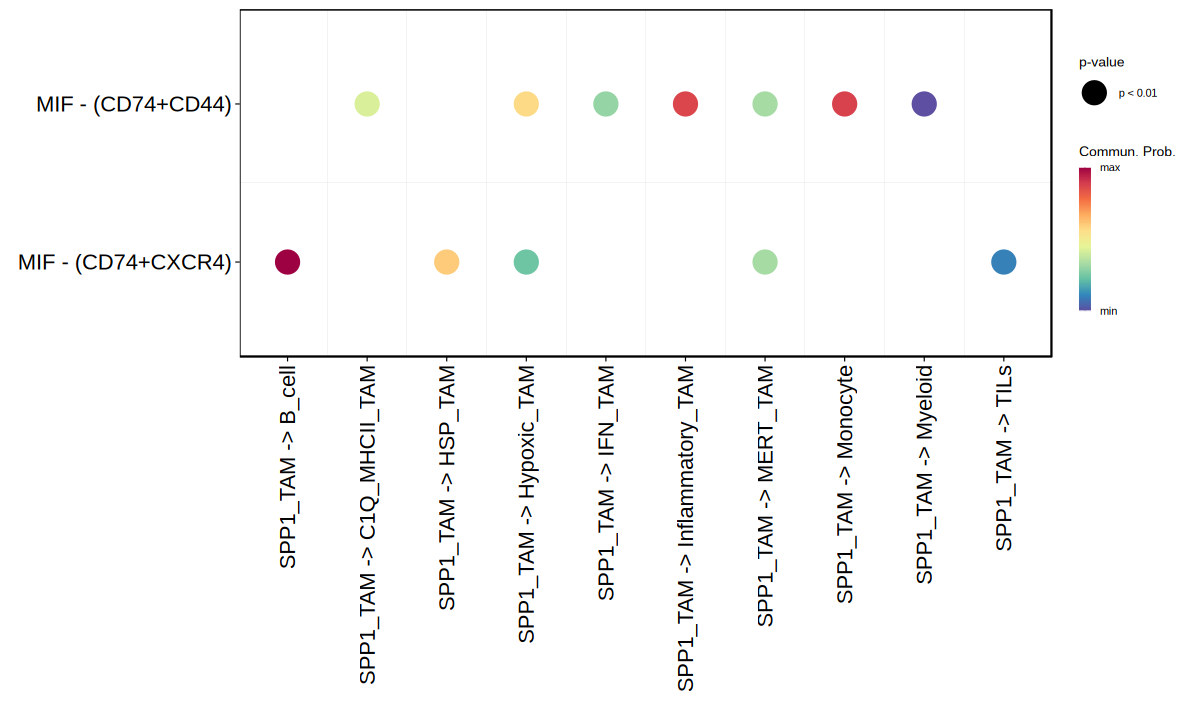

In [75]:
options(repr.plot.width = 10, repr.plot.height = 6)
netVisual_bubble(cellchat, 
                 sources.use = c(19), 
                 targets.use = c(1:20), 
                 pairLR.use = pairLR.use, 
                 remove.isolate = TRUE,
                 font.size = 16,
                 dot.size.min = 10)

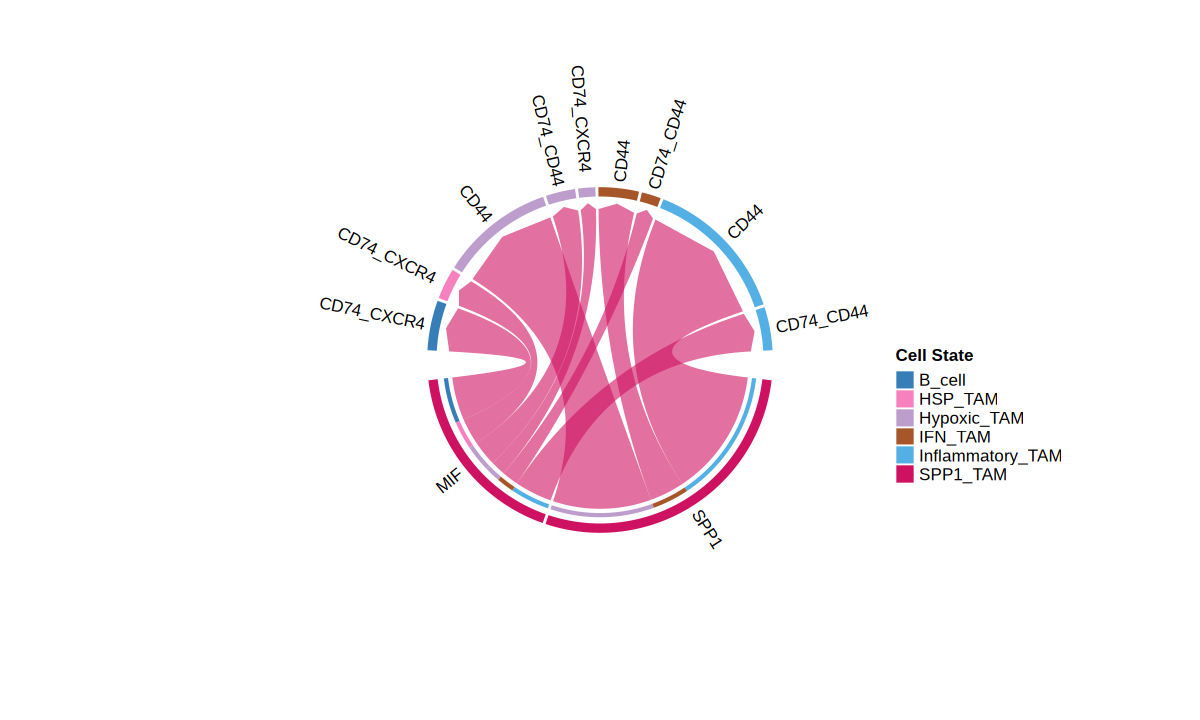

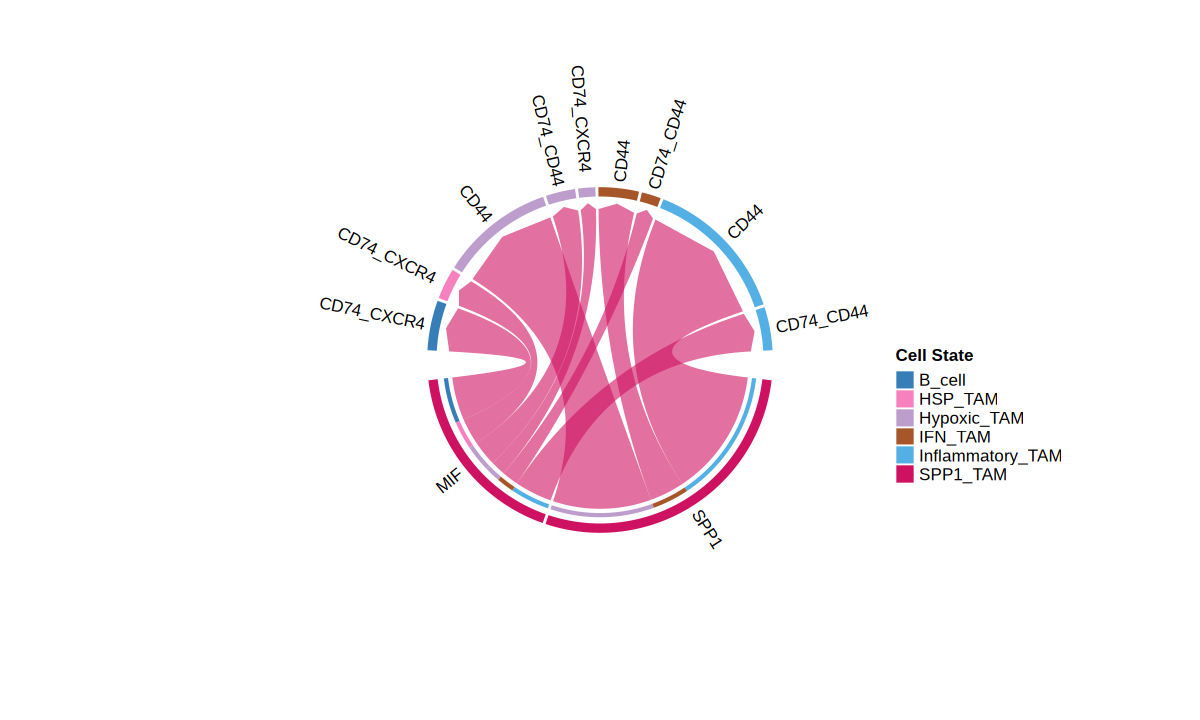

In [79]:
p <-netVisual_chord_gene(cellchat, sources.use = c(19), targets.use = c(2, 6, 7, 8, 9), signaling = c("SPP1", "MIF"),legend.pos.y = 50, legend.pos.x = 30)
p

In [82]:
??plotGeneExpresion

R Information

Help files with alias or concept or title matching ‘plotGeneExpresion’
using fuzzy matching:


CellChat::plotGeneExpression
                        A Seurat wrapper function for plotting gene
                        expression using violin plot, dot plot or bar
                        plot
  Aliases: plotGeneExpression


Type '?PKG::FOO' to inspect entries 'PKG::FOO', or 'TYPE?PKG::FOO' for
entries like 'PKG::FOO-TYPE'.




Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Scale for y is already present.
Adding another scale for y, which will replace the e

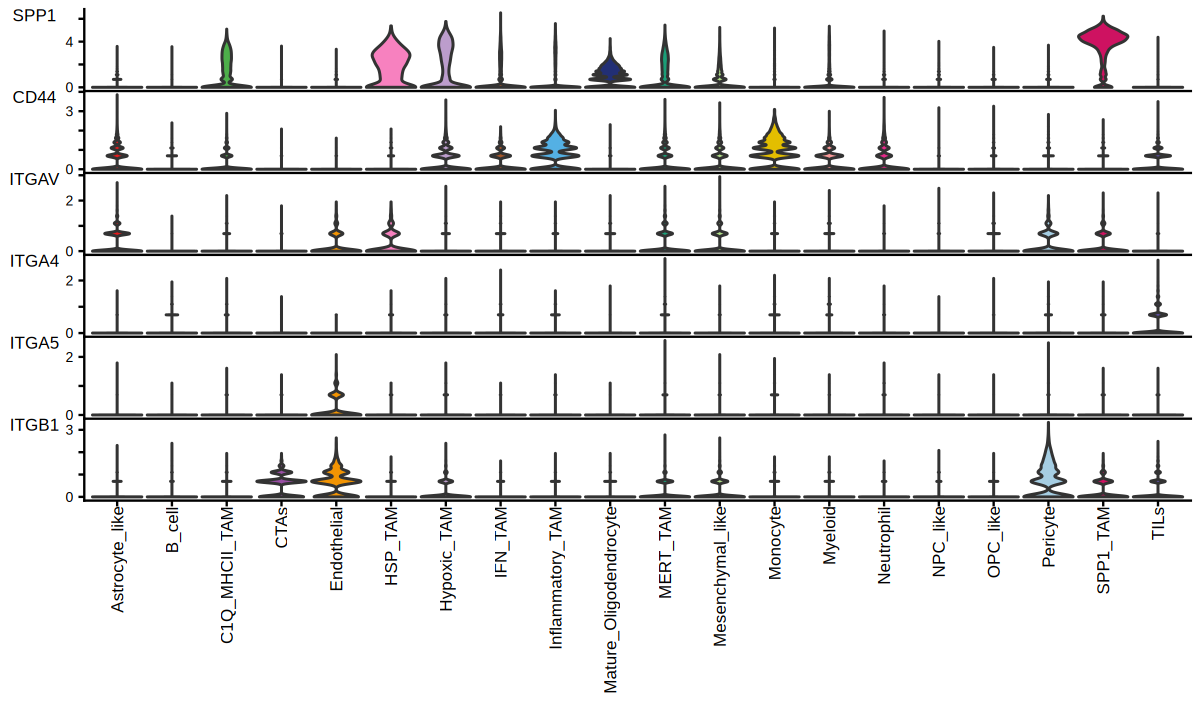

In [80]:
plotGeneExpression(cellchat, signaling = "SPP1", enriched.only = TRUE, type = "violin")

In [84]:
pathways.show <- 'SPP1'

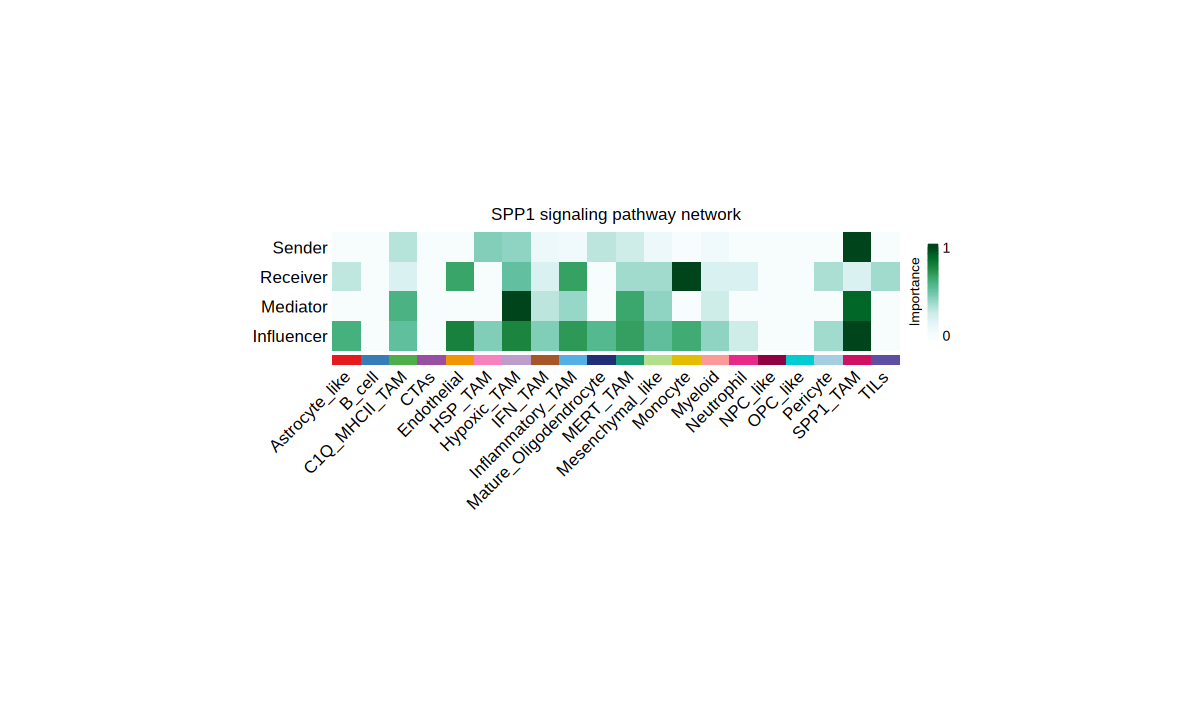

In [86]:
# cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "netP") # the slot 'netP' means the inferred intercellular communication network of signaling pathways
netAnalysis_signalingRole_network(cellchat, signaling = pathways.show, width = 12, height = 2.5, font.size = 10)